In [266]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel


In [267]:
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')
df_register = pd.read_csv('registration.csv')




# 2- Data Exploration and Preprocessing 

## Data Exploration


In [268]:
print("train Dataset:")
print(df_train.head())

print("\nInfo about train Dataset:")
print(df_train.info())

train Dataset:
                             Student ID   Age Gender   Home Region  Home City  \
0  4f14c50d-162e-4a15-9cf0-ec129c33bcf0  37.0    ذكر  منطقة الرياض     الرياض   
1  0599d409-876b-41a5-af05-749ef0e77d32  21.0    ذكر    منطقة عسير  خميس مشيط   
2  38a11c0e-4afc-4261-9c64-e94cc0a272fb  24.0    ذكر  منطقة الرياض     الرياض   
3  1693e85b-f80e-40ce-846f-395ddcece6d3  23.0    ذكر  منطقة الرياض     الرياض   
4  98a0e8d0-5f80-4634-afd8-322aa0902863  23.0    ذكر  منطقة الرياض     الرياض   

                             Program ID Program Main Category Code  \
0  453686d8-4023-4506-b2df-fac8b059ac26                       PCRF   
1  cc8e4e42-65d5-4fa1-82f9-6c6c2d508b60                       APMR   
2  e006900d-05a9-4c2b-a36f-0ffb9fce44cd                       APMR   
3  2ec15f6b-233b-428a-b9f5-e40bc8d14cf9                       TOSL   
4  d32da0e9-1aed-48c3-992d-a22f9ccc741e                       CAUF   

  Program Sub Category Code Technology Type Program Skill Level  ...  \
0    

In [269]:
print("test Dataset:")
print(df_test.head())

print("\nInfo about test Dataset:")
print(df_test.info())

test Dataset:
                             Student ID   Age Gender   Home Region Home City  \
0  d8524ed6-a1b2-4f6f-9041-66eebcab899a  23.0   أنثى  منطقة الرياض    الرياض   
1  5490b973-d85e-4b26-93a8-ecc11c47a5a0  31.0   أنثى  منطقة الرياض    الرياض   
2  3c1d99c8-f25b-4198-b904-aacb15164888  29.0   أنثى  منطقة الرياض    الرياض   
3  9e57ee90-2d60-48b8-91a1-7caa49f03810  23.0   أنثى  منطقة الرياض    الرياض   
4  a11b482b-6cc3-4e1a-8b95-60ab2e42097a  30.0   أنثى  منطقة الرياض    الرياض   

                             Program ID Program Main Category Code  \
0  451d680f-e067-41c0-a998-6b3da3963bca                       CAUF   
1  4957a013-46a7-419c-93d5-ebf3741ab2a1                       PCRF   
2  03ec0d20-11cd-49bf-9b54-de5d12d4bd76                       CAUF   
3  4ad7a7dc-abcf-43fa-b2e3-07095e083661                       PCRF   
4  60494e5b-b20a-4440-ab75-0fd257748dcc                       TOSL   

  Program Sub Category Code Technology Type Program Skill Level  ...  \
0           

In [270]:
print("Registration Dataset:")
print(df_register.head())

print("\nInfo about Registration Dataset:")
print(df_register.info())

Registration Dataset:
                             Student ID  PCRF  GRST  CAUF  INFA  ABIR  SERU  \
0  0005f921-db87-47a3-af19-000332af236b     6     0     1     3     0     0   
1  000f66b3-6ad7-4a6c-9f1f-0d34b005c5e6     0     0     7     0     0     0   
2  001a2d9a-54ee-4ae9-91b4-d6fe03c98ce0     0     0     2     0     0     0   
3  00235747-dd1a-4f59-be5b-4aeb66e037a1     0     0     1     0     0     0   
4  00252da1-947b-4116-a096-852830ac0f89     0     0     1     1     0     0   

   TOSL  APMR  DTFH  QWLM  N/A  Total Regestration  
0     0     3     0     0    6                  19  
1     0     1     0     0    0                   8  
2     0     1     0     0    0                   3  
3     0     0     0     0    0                   1  
4     0     1     0     0    7                  10  

Info about Registration Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6171 entries, 0 to 6170
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dty

In [271]:
# Check for missing values
print("\nMissing Values in train Dataset:")
print(df_train.isnull().sum())



Missing Values in train Dataset:
Student ID                           0
Age                                 92
Gender                               0
Home Region                          2
Home City                            2
Program ID                           0
Program Main Category Code           0
Program Sub Category Code          935
Technology Type                   2982
Program Skill Level               1646
Program Presentation Method          0
Program Start Date                   0
Program End Date                     0
Program Days                         0
Completed Degree                     0
Level of Education                  26
Education Speaciality              277
College                           3890
University Degree Score             81
University Degree Score System      81
Employment Status                  566
Job Type                          4567
Still Working                     4567
Y                                    0
dtype: int64


In [272]:
# Check for missing values
print("\nMissing Values in test Dataset:")
print(df_test.isnull().sum())



Missing Values in test Dataset:
Student ID                          0
Age                                14
Gender                              0
Home Region                         1
Home City                           1
Program ID                          0
Program Main Category Code          0
Program Sub Category Code         115
Technology Type                   364
Program Skill Level               200
Program Presentation Method         0
Program Start Date                  0
Program End Date                    0
Program Days                        0
Completed Degree                    0
Level of Education                  3
Education Speaciality              37
College                           492
University Degree Score            11
University Degree Score System     11
Employment Status                  70
Job Type                          581
Still Working                     581
dtype: int64


In [273]:
print("\nMissing Values in Registration Dataset:")
print(df_register.isnull().sum())


Missing Values in Registration Dataset:
Student ID            0
PCRF                  0
GRST                  0
CAUF                  0
INFA                  0
ABIR                  0
SERU                  0
TOSL                  0
APMR                  0
DTFH                  0
QWLM                  0
N/A                   0
Total Regestration    0
dtype: int64


<Figure size 1000x2000 with 0 Axes>

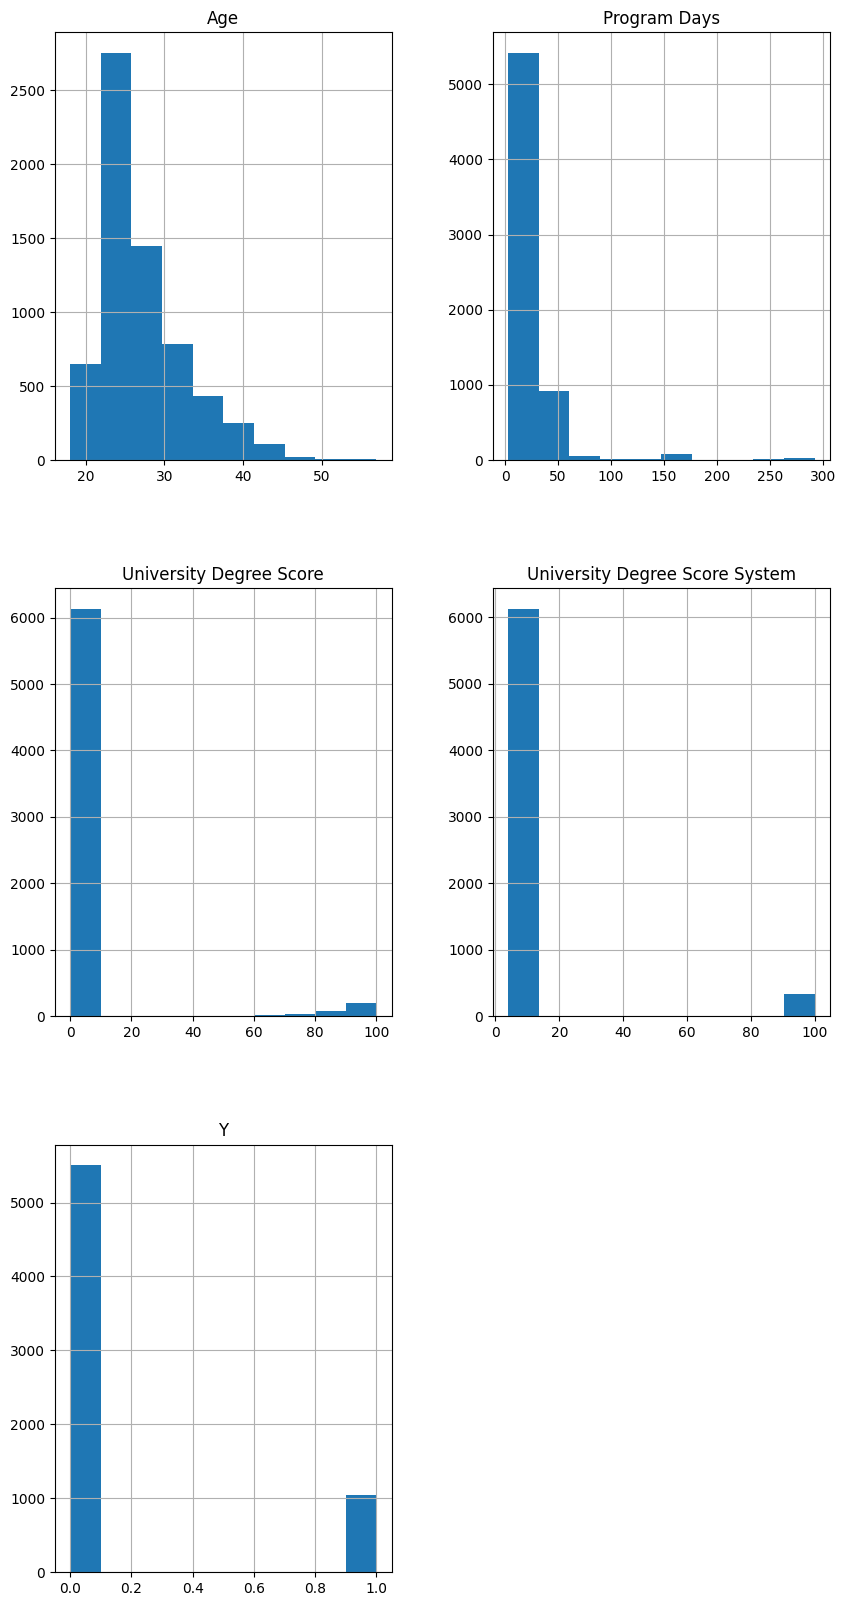

In [274]:

#Visualize distributions of numerical variables in the merged dataset

plt.figure(figsize=(10, 20))
df_train.hist(figsize=(10, 20))
plt.show()

<Figure size 1000x800 with 0 Axes>

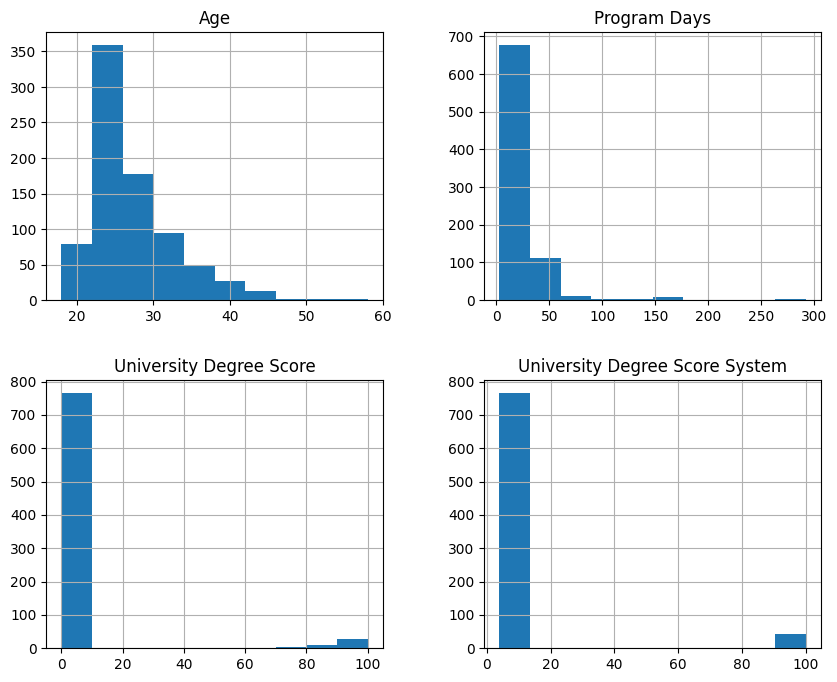

In [275]:

#Visualize distributions of numerical variables in the merged dataset

plt.figure(figsize=(10, 8))
df_test.hist(figsize=(10, 8))
plt.show()

<Figure size 1000x800 with 0 Axes>

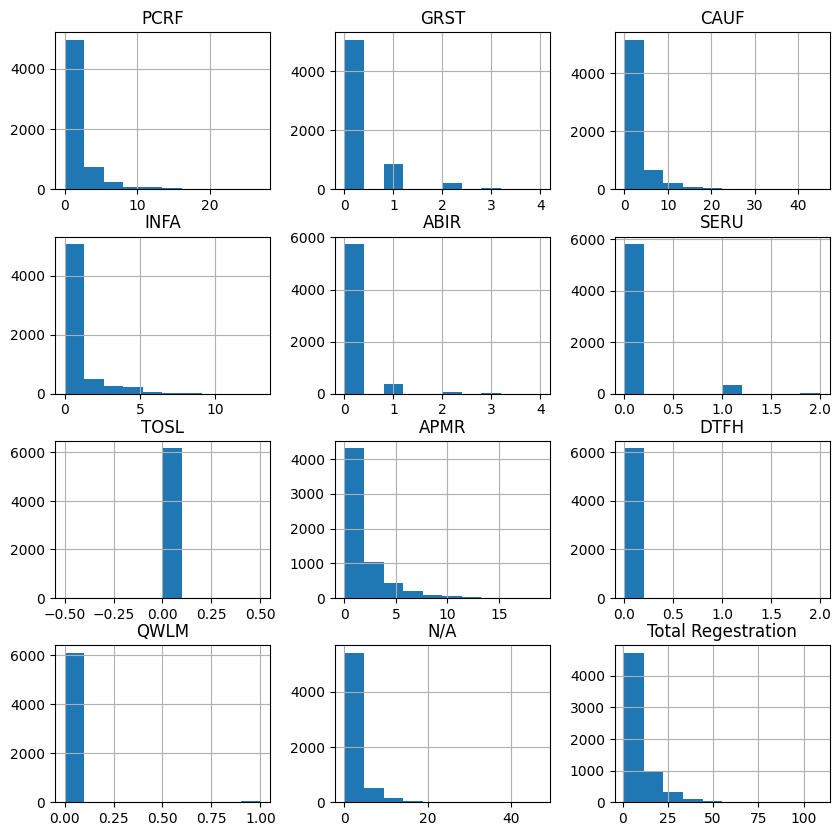

In [276]:
# Visualize distributions of numerical variables in the registration dataset
plt.figure(figsize=(10, 8))
df_register.hist(figsize=(10, 10))
plt.show()


## Preprocessing

In [277]:
#Identify Columns with Missing Values
columns_with_missing = df_train.columns[df_train.isnull().any()]

print("Columns with missing values:")
print(columns_with_missing)

Columns with missing values:
Index(['Age', 'Home Region', 'Home City', 'Program Sub Category Code',
       'Technology Type', 'Program Skill Level', 'Level of Education',
       'Education Speaciality', 'College', 'University Degree Score',
       'University Degree Score System', 'Employment Status', 'Job Type',
       'Still Working'],
      dtype='object')


In [278]:
#Identify Columns with Missing Values
columns_with_missing = df_test.columns[df_test.isnull().any()]

print("Columns with missing values:")
print(columns_with_missing)

Columns with missing values:
Index(['Age', 'Home Region', 'Home City', 'Program Sub Category Code',
       'Technology Type', 'Program Skill Level', 'Level of Education',
       'Education Speaciality', 'College', 'University Degree Score',
       'University Degree Score System', 'Employment Status', 'Job Type',
       'Still Working'],
      dtype='object')


In [279]:
# Impute missing numerical values with mean
numerical_columns = ['Age', 'University Degree Score','University Degree Score System']
for column in numerical_columns:
    df_train[column].fillna(df_train[column].mean(), inplace=True)


In [280]:
# Impute missing numerical values with mean
numerical_columns = ['Age', 'University Degree Score','University Degree Score System']
for column in numerical_columns:
    df_test[column].fillna(df_test[column].mean(), inplace=True)

In [281]:
# Impute missing categorical values with mode
categorical_columns = ['Home Region',  'Level of Education', 'Education Speaciality', 'Employment Status']
for column in categorical_columns:
    df_train[column].fillna(df_train[column].mode()[0], inplace=True)

In [282]:
# Impute missing categorical values with mode
categorical_columns = ['Home Region',  'Level of Education', 'Education Speaciality', 'Employment Status']
for column in categorical_columns:
    df_test[column].fillna(df_test[column].mode()[0], inplace=True)

In [283]:

# Impute missing values in 'Program Sub Category Code' with a new category
df_train['Program Sub Category Code'].fillna('Unknown', inplace=True)


In [284]:

# Impute missing values in 'Program Sub Category Code' with a new category
df_test['Program Sub Category Code'].fillna('Unknown', inplace=True)


In [285]:

# Drop columns with a large number of missing values
# Columns to drop: 
columns_to_drop = ['Home City','Technology Type' ,'Program Skill Level', 'College', 'Job Type','Still Working','Program Start Date' ,'Program End Date']

df_train.drop(columns_to_drop, axis=1, inplace=True)


In [286]:

# Drop columns with a large number of missing values
# Columns to drop: 
columns_to_drop = ['Home City','Technology Type' ,'Program Skill Level', 'College', 'Job Type','Still Working','Program Start Date' ,'Program End Date']

df_test.drop(columns_to_drop, axis=1, inplace=True)


In [287]:
# 'University Degree Score System'

# Define the outlier threshold
outlier_threshold = 5

# Define a function to apply the transformation
def scale_outliers(value):
    if value > outlier_threshold:
        scaled_value = value / 20  # Assuming the max value is 100
        return min(5, scaled_value)  # Ensure the scaled value does not exceed 5
    else:
        return value

# Apply the function to the 'University Degree Score System' column
df_train['University Degree Score System'] = df_train['University Degree Score System'].apply(scale_outliers)


In [288]:
# 'University Degree Score System'

# Define the outlier threshold
outlier_threshold = 5

# Define a function to apply the transformation
def scale_outliers(value):
    if value > outlier_threshold:
        scaled_value = value / 20  # Assuming the max value is 100
        return min(5, scaled_value)  # Ensure the scaled value does not exceed 5
    else:
        return value

# Apply the function to the 'University Degree Score System' column
df_test['University Degree Score System'] = df_test['University Degree Score System'].apply(scale_outliers)


<Figure size 1000x2000 with 0 Axes>

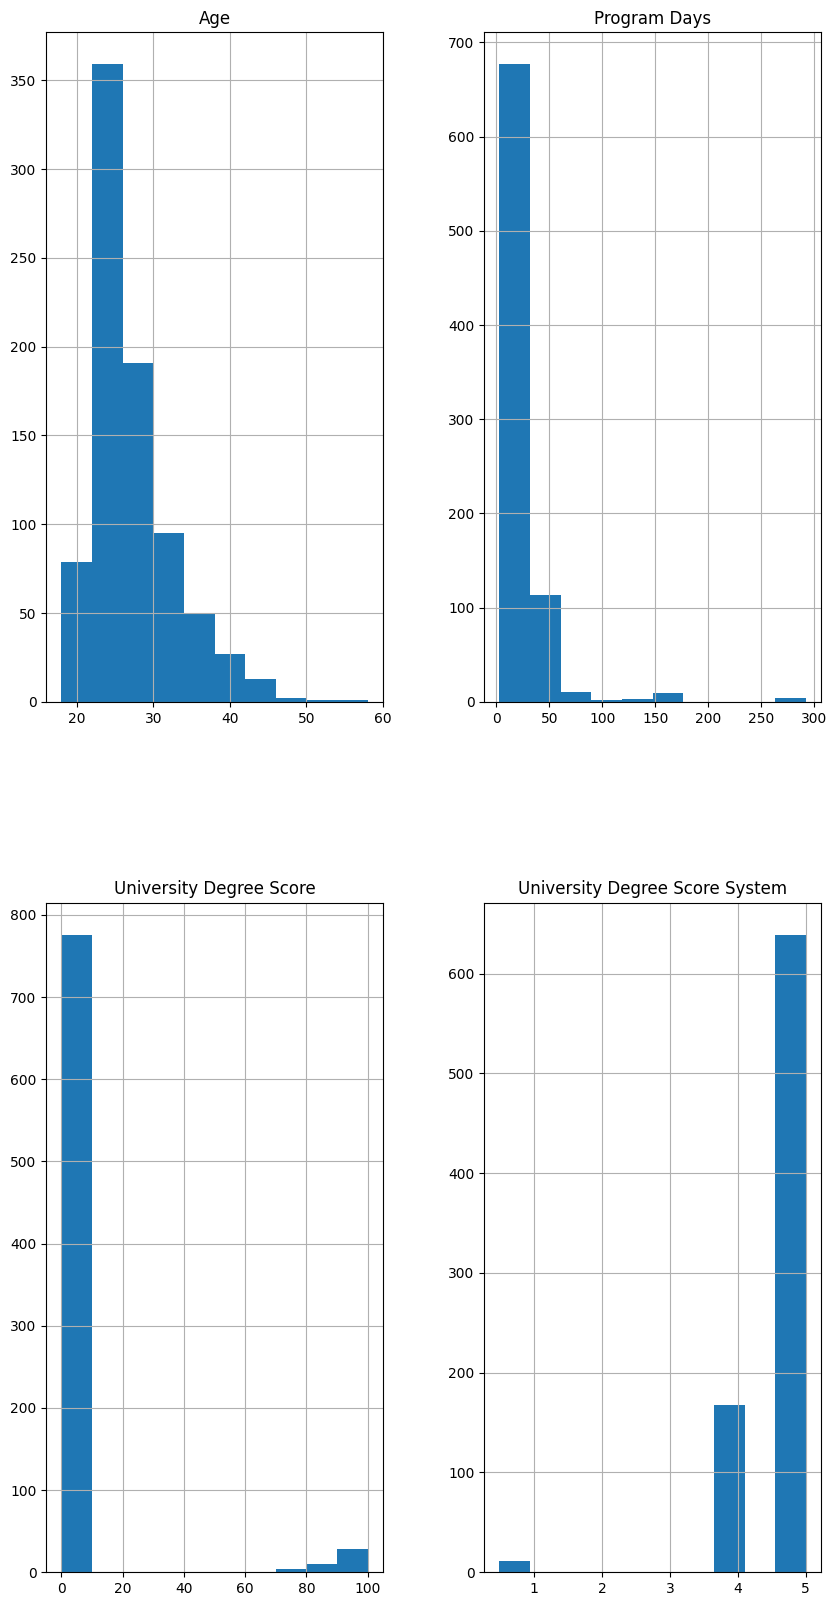

In [289]:

#Visualize distributions of numerical variables in the merged dataset

plt.figure(figsize=(10, 20))
df_test.hist(figsize=(10, 20))
plt.show()

<Figure size 1000x2000 with 0 Axes>

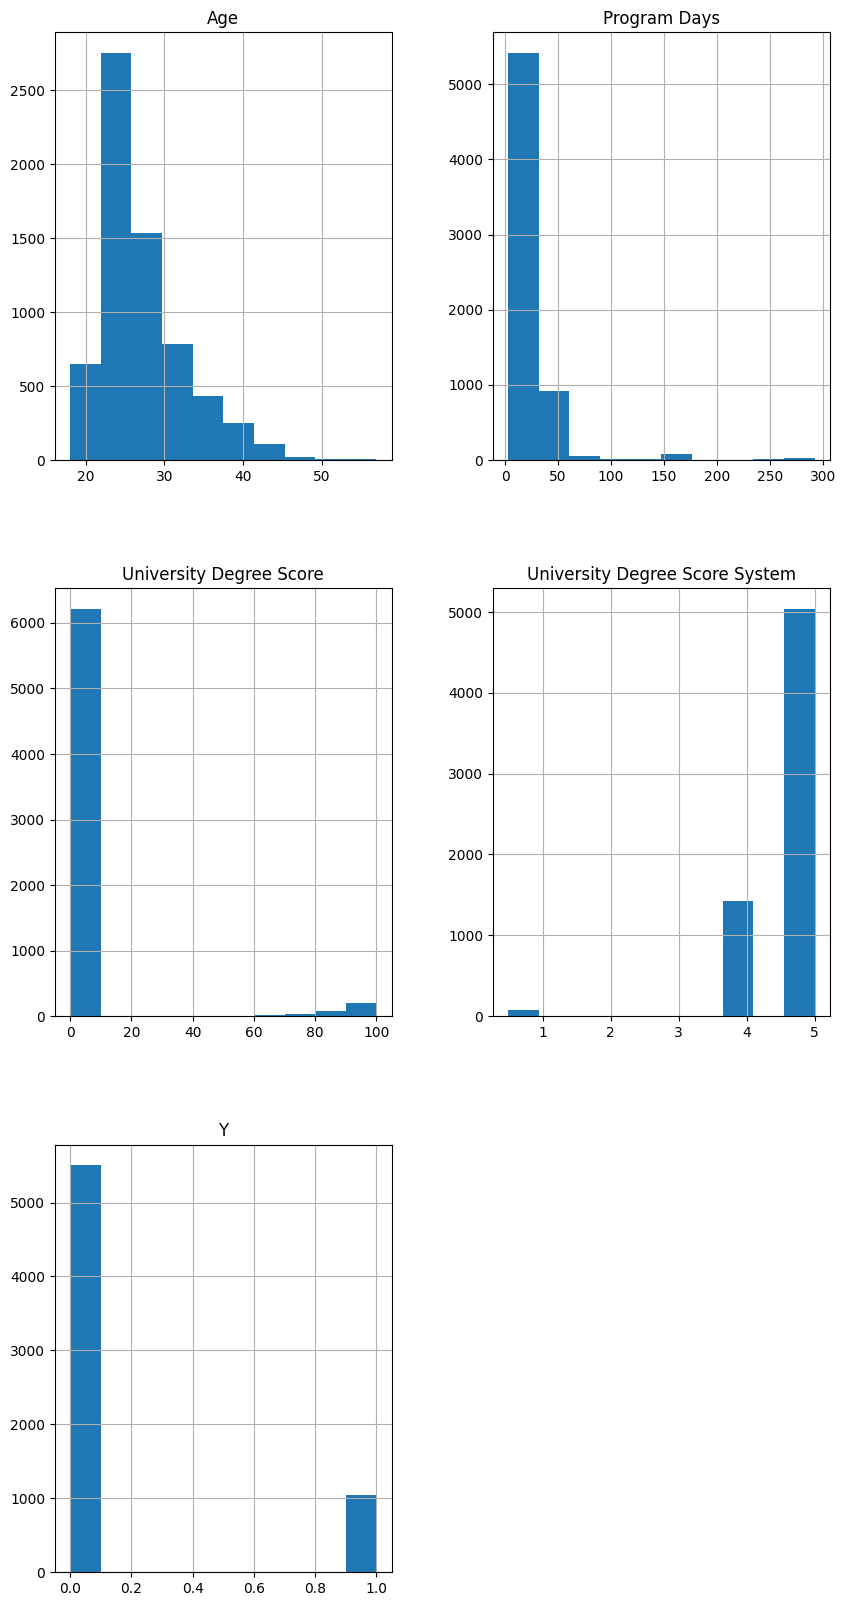

In [290]:

#Visualize distributions of numerical variables in the merged dataset

plt.figure(figsize=(10, 20))
df_train.hist(figsize=(10, 20))
plt.show()

In [291]:
print("Missing Values After Handling:")
print(df_train.isnull().sum())

Missing Values After Handling:
Student ID                        0
Age                               0
Gender                            0
Home Region                       0
Program ID                        0
Program Main Category Code        0
Program Sub Category Code         0
Program Presentation Method       0
Program Days                      0
Completed Degree                  0
Level of Education                0
Education Speaciality             0
University Degree Score           0
University Degree Score System    0
Employment Status                 0
Y                                 0
dtype: int64


In [292]:
print("Missing Values After Handling:")
print(df_test.isnull().sum())

Missing Values After Handling:
Student ID                        0
Age                               0
Gender                            0
Home Region                       0
Program ID                        0
Program Main Category Code        0
Program Sub Category Code         0
Program Presentation Method       0
Program Days                      0
Completed Degree                  0
Level of Education                0
Education Speaciality             0
University Degree Score           0
University Degree Score System    0
Employment Status                 0
dtype: int64


In [293]:


def encoders(df_train):
    # Initialize LabelEncoder
    encoder = preprocessing.LabelEncoder()
    
    # Define columns to encode
    columns_to_encode = ['Home Region', 'Program ID','Gender','Program Main Category Code', 'Program Sub Category Code', 'Program Presentation Method', 'Completed Degree', 'Level of Education', 'Employment Status','Education Speaciality']


    # Encode categorical columns
    for column in columns_to_encode:
        df_train[column] = encoder.fit_transform(df_train[column])
    
    return df_train

# Apply encoding
df_train_encoded = encoders(df_train)




In [294]:
def encode_student_ids(df_train):
    # Initialize LabelEncoder
    encoder = preprocessing.LabelEncoder()
    
    # Encode student IDs
    df_train['Student ID'] = encoder.fit_transform(df_train['Student ID'])
    
    return df_train, encoder

# Apply encoding
df_train_encoded, student_id_encoder = encode_student_ids(df_train)

In [295]:

def encoders(df_test):
    # Initialize LabelEncoder
    encoder = preprocessing.LabelEncoder()
    
    # Define columns to encode
    columns_to_encode = ['Home Region', 'Program ID','Gender','Program Main Category Code', 'Program Sub Category Code', 'Program Presentation Method', 'Completed Degree', 'Level of Education', 'Employment Status','Education Speaciality']
    
    # Encode categorical columns
    for column in columns_to_encode:
        df_test[column] = encoder.fit_transform(df_test[column])
    
    return df_test

# Apply encoding
df_test_encoded = encoders(df_test)


In [296]:


def encode_student_ids(df_test):
    # Initialize LabelEncoder
    encoder = preprocessing.LabelEncoder()
    
    # Encode student IDs
    df_test['Student ID'] = encoder.fit_transform(df_test['Student ID'])
    
    return df_test, encoder

# Apply encoding
df_test_encoded, student_id_encoder = encode_student_ids(df_test)



In [297]:

# Select numerical columns for scaling
numerical_columns = ['Age', 'Program Days', 'University Degree Score']

# Initialize the scaler
scaler =  MinMaxScaler()

# Scale numerical features
df_train[numerical_columns] = scaler.fit_transform(df_train[numerical_columns])

# Display the first few rows of the scaled DataFrame
print(df_train.head())

   Student ID       Age  Gender  Home Region  Program ID  \
0        1598  0.487179       1            4          65   
1          97  0.076923       1           10         180   
2        1126  0.153846       1            4         197   
3         443  0.128205       1            4          43   
4        3089  0.128205       1            4         188   

   Program Main Category Code  Program Sub Category Code  \
0                           6                          6   
1                           1                          9   
2                           1                         11   
3                           9                         10   
4                           2                          9   

   Program Presentation Method  Program Days  Completed Degree  \
0                            0      0.031142                 1   
1                            0      0.006920                 1   
2                            0      0.176471                 1   
3             

<Figure size 1000x2000 with 0 Axes>

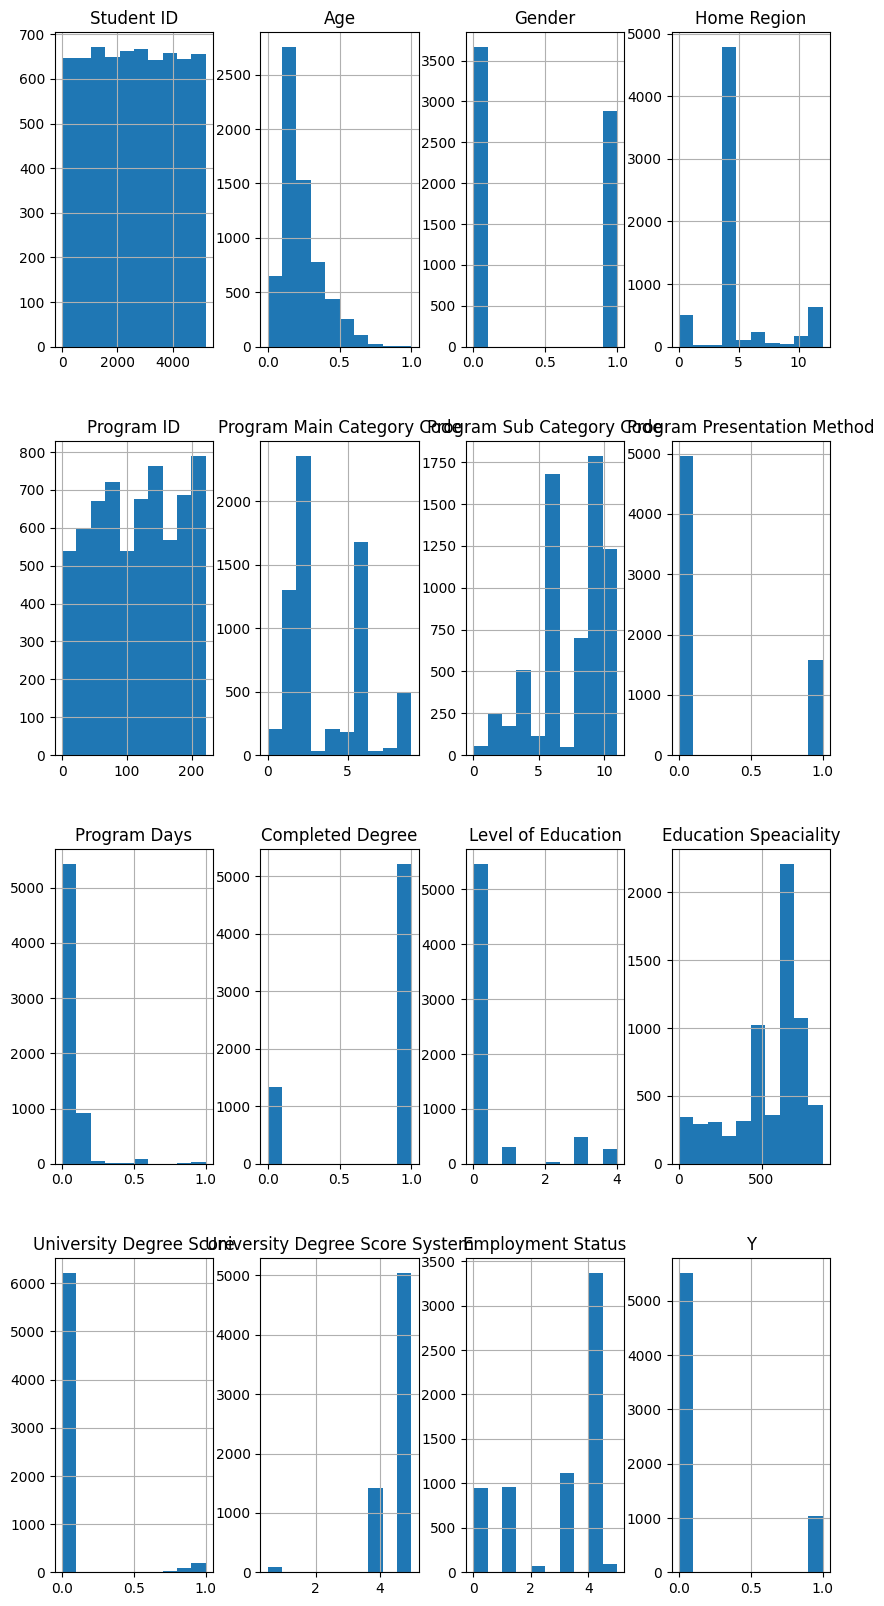

In [298]:

#Visualize distributions of numerical variables in the merged dataset

plt.figure(figsize=(10, 20))
df_train.hist(figsize=(10, 20))
plt.show()

In [299]:

# Select numerical columns for scaling
numerical_columns = ['Age', 'Program Days', 'University Degree Score']

# Initialize the scaler
scaler =  MinMaxScaler()

# Scale numerical features
df_test[numerical_columns] = scaler.fit_transform(df_test[numerical_columns])

# Display the first few rows of the scaled DataFrame
print(df_test.head())

   Student ID    Age  Gender  Home Region  Program ID  \
0         657  0.125       0            4          59   
1         246  0.325       0            4          65   
2         172  0.275       0            4           3   
3         468  0.125       0            4          67   
4         477  0.300       0            4          85   

   Program Main Category Code  Program Sub Category Code  \
0                           2                          8   
1                           6                          5   
2                           2                          8   
3                           6                          5   
4                           9                         10   

   Program Presentation Method  Program Days  Completed Degree  \
0                            1      0.006920                 0   
1                            1      0.055363                 0   
2                            1      0.031142                 1   
3                            0  

<Figure size 1000x2000 with 0 Axes>

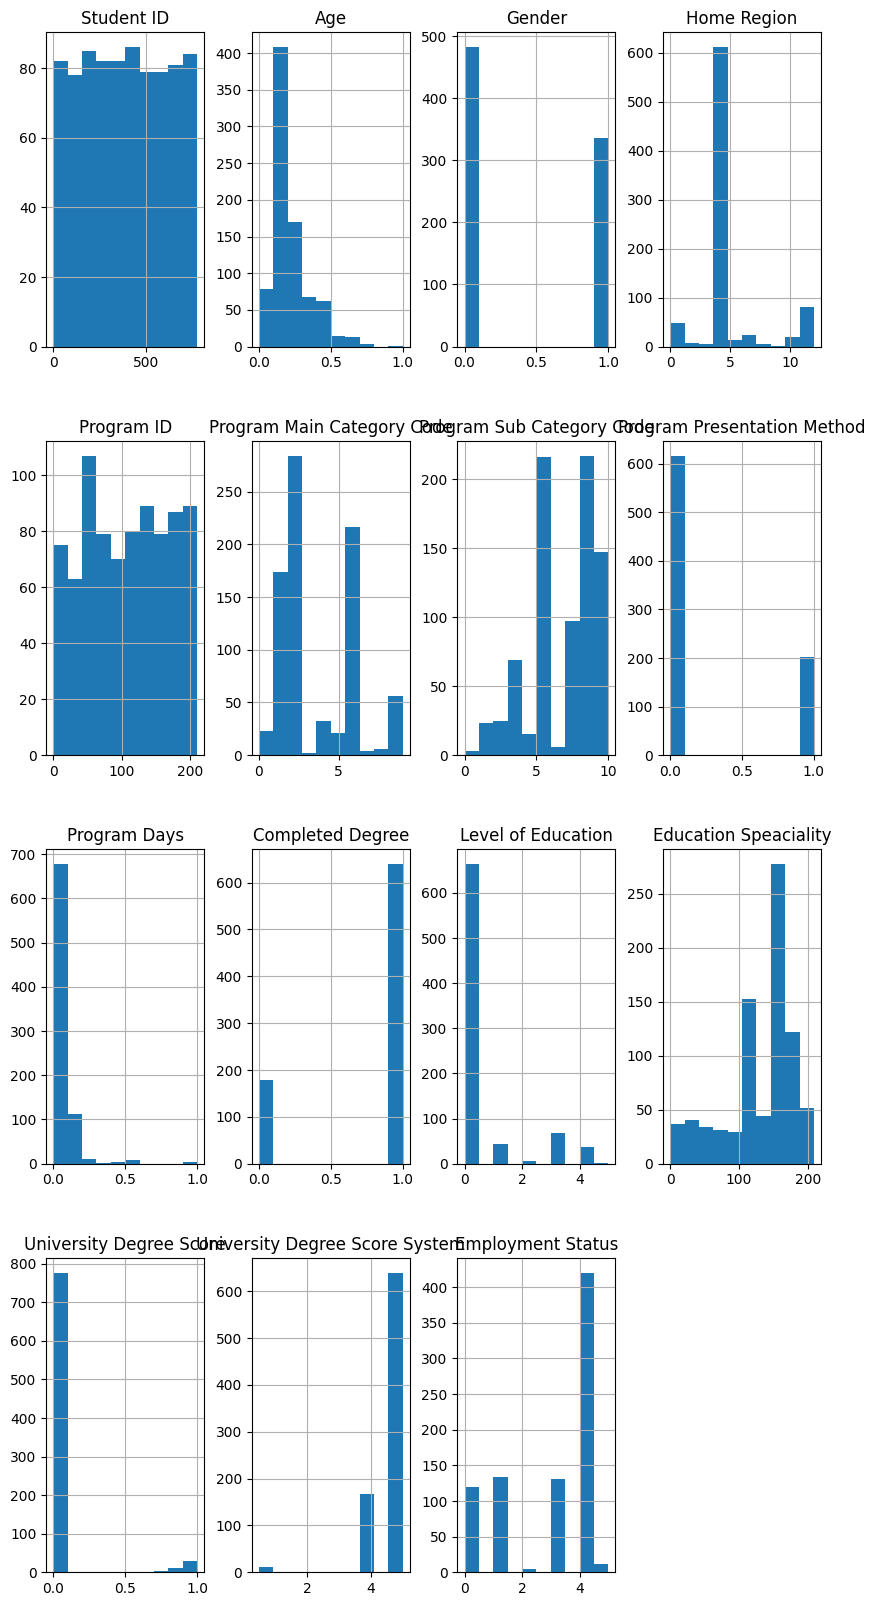

In [300]:

#Visualize distributions of numerical variables in the merged dataset

plt.figure(figsize=(10, 20))
df_test.hist(figsize=(10, 20))
plt.show()

In [301]:


def detect_outlier(data):
    
 outliers= []
 threshold = 3
 mean = np.mean(data)
 std =np.std(data)


 for i in data:
        z_score = (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
            
 return outliers


    
    

In [302]:


# Iterate over numerical columns and detect outliers
all_outliers = {}
numerical_columns = df_train.select_dtypes(include=['float64', 'int64']).columns

for column in numerical_columns:
    outliers = detect_outlier(df_train[column])
    all_outliers[column] = outliers
    

# Print outliers in each numerical column
for column, outliers in all_outliers.items():
    print(f"Outliers in '{column}' column:")
    print(outliers)
    print()


Outliers in 'Student ID' column:
[]

Outliers in 'Age' column:
[0.7179487179487181, 0.6923076923076923, 0.7435897435897436, 0.6666666666666667, 0.6666666666666667, 0.7948717948717949, 0.7948717948717949, 0.6666666666666667, 0.6666666666666667, 0.6666666666666667, 0.9487179487179487, 0.6666666666666667, 0.7435897435897436, 0.6666666666666667, 0.7179487179487181, 0.6923076923076923, 0.7692307692307694, 0.7948717948717949, 0.7435897435897436, 0.6666666666666667, 0.7692307692307694, 0.6923076923076923, 0.6666666666666667, 0.7948717948717949, 0.8717948717948718, 0.7692307692307694, 0.6666666666666667, 0.6923076923076923, 0.8205128205128205, 0.6923076923076923, 0.6666666666666667, 0.6923076923076923, 0.9487179487179487, 0.7179487179487181, 0.6666666666666667, 0.7179487179487181, 0.7692307692307694, 0.8461538461538463, 0.6666666666666667, 0.9743589743589745, 0.7179487179487181, 0.6666666666666667, 0.6923076923076923, 0.6666666666666667, 0.6666666666666667, 0.6923076923076923, 0.89743589743589

In [303]:
# Iterate over numerical columns and detect outliers
all_outliers = {}
numerical_columns = df_test.select_dtypes(include=['float64', 'int64']).columns

for column in numerical_columns:
    outliers = detect_outlier(df_test[column])
    all_outliers[column] = outliers
    

# Print outliers in each numerical column
for column, outliers in all_outliers.items():
    print(f"Outliers in '{column}' column:")
    print(outliers)
    print()


Outliers in 'Student ID' column:
[]

Outliers in 'Age' column:
[0.8, 0.625, 0.625, 1.0000000000000002, 0.7500000000000002, 0.625, 0.7500000000000002, 0.675, 0.6500000000000001, 0.6500000000000001, 0.625, 0.6500000000000001, 0.6500000000000001]

Outliers in 'Gender' column:
[]

Outliers in 'Home Region' column:
[]

Outliers in 'Program ID' column:
[]

Outliers in 'Program Main Category Code' column:
[]

Outliers in 'Program Sub Category Code' column:
[]

Outliers in 'Program Presentation Method' column:
[]

Outliers in 'Program Days' column:
[0.5882352941176471, 0.5882352941176471, 0.45674740484429066, 0.5882352941176471, 0.5882352941176471, 0.45674740484429066, 0.5882352941176471, 0.5882352941176471, 0.9999999999999999, 0.9999999999999999, 0.9999999999999999, 0.9999999999999999, 0.5882352941176471, 0.5882352941176471, 0.45674740484429066, 0.5882352941176471]

Outliers in 'Completed Degree' column:
[]

Outliers in 'Level of Education' column:
[4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4

In [304]:
# # Remove outliers from numerical columns
# for column in numerical_columns:
#     outliers = detect_outlier(df_train[column])
#     df_train = df_train[~df_train[column].isin(outliers)]


# 3- Model Building 

In [305]:

# Assuming merged_df_encoded is your preprocessed and encoded merged dataframe
# Assuming 'Y' is your target variable


# Split the dataset into features (X) and the target variable (y)
X = df_train.drop('Y', axis=1)  # Features
y = df_train['Y']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you have X_train, X_test (features) and y_train, y_test (target variable) for training and testing your models



In [306]:
# Show the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# Show the first few rows of the training set
print("First few rows of X_train:")
print(X_train.head())

# Show the first few rows of the testing set
print("First few rows of X_test:")
print(X_test.head())

# Show the first few rows of the target variable in the training set
print("First few rows of y_train:")
print(y_train.head())

# Show the first few rows of the target variable in the testing set
print("First few rows of y_test:")
print(y_test.head())


Shape of X_train: (5238, 15)
Shape of X_test: (1310, 15)
Shape of y_train: (5238,)
Shape of y_test: (1310,)
First few rows of X_train:
      Student ID       Age  Gender  Home Region  Program ID  \
1706        2905  0.128205       1           11         218   
751         1480  0.410256       1            4         207   
584          959  0.102564       1            4          98   
1220        1516  0.128205       1           10         209   
2251         147  0.153846       1            4         210   

      Program Main Category Code  Program Sub Category Code  \
1706                           1                          8   
751                            6                          6   
584                            2                          9   
1220                           1                          8   
2251                           2                          9   

      Program Presentation Method  Program Days  Completed Degree  \
1706                            1     

In [307]:
# Calculate the total number of rows in the original dataset
total_rows_original = df_train.shape[0]

# Calculate the total number of rows in the training and testing sets
total_rows_train = X_train.shape[0]
total_rows_test = X_test.shape[0]

# Calculate the number of error data (rows not included in training or testing sets)
error_rows = total_rows_original - (total_rows_train + total_rows_test)

print("Number of error data:", error_rows)


Number of error data: 0


In [308]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.utils import class_weight
import numpy as np

# Ensure that X_train, X_test, y_train, and y_test are properly defined

try:
    # Define class weights to address class imbalance
    class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
    
    # Define hyperparameters grid for tuning
    param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
        'solver': ['liblinear', 'lbfgs', 'saga']  # Solver algorithm
    }

    # Initialize logistic regression model
    logreg = LogisticRegression(random_state=42, max_iter=1000, class_weight=dict(enumerate(class_weights)))

    # Initialize GridSearchCV
    grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='f1')

    # Perform GridSearchCV to find the best hyperparameters
    grid_search.fit(X_train, y_train)

    # Get the best hyperparameters
    best_params = grid_search.best_params_
    print("Best Hyperparameters:", best_params)

    # Use the best model from GridSearchCV
    best_model = grid_search.best_estimator_

    # Make predictions on the testing data
    y_pred = best_model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

    precision = precision_score(y_test, y_pred)
    print("Precision:", precision)

    recall = recall_score(y_test, y_pred)
    print("Recall:", recall)

    f1 = f1_score(y_test, y_pred)
    print("F1-score:", f1)

    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    

except ValueError as e:
    print("Error:", e)


/opt/anaconda3/envs/ash/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/ash/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

Best Hyperparameters: {'C': 10, 'solver': 'liblinear'}
Accuracy: 0.8427480916030534
Precision: 0.4768211920529801
Recall: 0.75
F1-score: 0.582995951417004

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.86      0.90      1118
           1       0.48      0.75      0.58       192

    accuracy                           0.84      1310
   macro avg       0.71      0.80      0.74      1310
weighted avg       0.88      0.84      0.86      1310



/opt/anaconda3/envs/ash/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [309]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Ensure that X_train, X_test, y_train, and y_test are properly defined

try:
    model=[]
    # Initialize the logistic regression model
    model= LogisticRegression(random_state=42)

    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test,y_pred)
    print("Accuracy:", accuracy)

    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    
  
    

except ValueError as e:
    print("Error:", e)




Accuracy: 0.849618320610687

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1118
           1       0.40      0.05      0.09       192

    accuracy                           0.85      1310
   macro avg       0.63      0.52      0.51      1310
weighted avg       0.79      0.85      0.80      1310



/opt/anaconda3/envs/ash/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [310]:
X_train.head()


,Student ID,Age,Gender,Home Region,Program ID,Program Main Category Code,Program Sub Category Code,Program Presentation Method,Program Days,Completed Degree,Level of Education,Education Speaciality,University Degree Score,University Degree Score System,Employment Status
1706,2905,0.128205,1,11,218,1,8,1,0.006920,1,0,651,0.03420,4.0,4
751,1480,0.410256,1,4,207,6,6,0,0.006920,0,0,810,0.01947,4.0,3
584,959,0.102564,1,4,98,2,9,0,0.031142,1,4,651,0.91000,5.0,4
1220,1516,0.128205,1,10,209,1,8,1,0.006920,0,0,44,0.04290,5.0,1
2251,147,0.153846,1,4,210,2,9,0,0.006920,1,0,400,0.03780,5.0,3


In [311]:
y_pred = model.predict(X_train)

In [312]:
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8449789996181749


In [313]:
precision = precision_score(y_train, y_pred)
print("Precision:", precision)

Precision: 0.6422764227642277


In [314]:
recall = recall_score(y_train, y_pred)
print("Recall:", recall)

Recall: 0.09327036599763873


In [315]:
f1 = f1_score(y_train, y_pred)
print("F1-score:", f1)


F1-score: 0.16288659793814433


In [316]:
print("\nClassification Report:")
print(classification_report(y_train, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.91      4391
           1       0.64      0.09      0.16       847

    accuracy                           0.84      5238
   macro avg       0.75      0.54      0.54      5238
weighted avg       0.82      0.84      0.79      5238



# 4- Model Improvement

In [317]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV

# Step 1: Increase max_iter parameter of LogisticRegression
lmodel= LogisticRegression(random_state=42, max_iter=1000)

# Step 2: Feature Scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Train the logistic regression model with scaled features
model.fit(X_train_scaled, y_train)

# Step 4: Make predictions and evaluate the model
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 5: Model Selection - Example: Random Forest Classifier
model= RandomForestClassifier()

# Step 6: Fine-tuning Hyperparameters using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV( model , param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
best_rf_clf = grid_search.best_estimator_

# Step 7: Feature Selection using Random Forest feature importances
selector = SelectFromModel(best_rf_clf)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Step 8: Train the final model
best_rf_clf.fit(X_train_selected, y_train)

# Step 9: Evaluate the final model
y_pred_rf = best_rf_clf.predict(X_test_selected)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("\nRandom Forest Accuracy:", accuracy_rf)


Accuracy: 0.8541984732824427

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92      1118
           1       0.50      0.43      0.46       192

    accuracy                           0.85      1310
   macro avg       0.70      0.68      0.69      1310
weighted avg       0.85      0.85      0.85      1310


Random Forest Accuracy: 0.8900763358778626


In [318]:
# Update class weights to address class imbalance
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

# Adjust threshold for RandomForestClassifier
y_pred_proba = best_rf_clf.predict_proba(X_test_selected)
threshold = 0.5  # Adjust this threshold as needed
y_pred_rf_adjusted = (y_pred_proba[:, 1] > threshold).astype(int)


In [319]:
# 1. Creating New Features (Example: Interaction Terms)
# Let's create interaction terms for pairs of features
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# 2. Transforming Existing Features (Example: Log Transformation)
# Let's take the logarithm of features with skewed distributions
skewed_features = ['Age', 'University Degree Score']
X_train_log = X_train.copy()
X_test_log = X_test.copy()

for feature in skewed_features:
    X_train_log[feature] = np.log1p(X_train_log[feature])
    X_test_log[feature] = np.log1p(X_test_log[feature])

# 3. Removing Irrelevant Features
# Let's use feature selection techniques to identify important features
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(RandomForestClassifier())
selector.fit(X_train, y_train)

X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Now, you can proceed with training and evaluating the model using the transformed features


Generate predictions for the test dataset using the trained models.

In [320]:

model.fit(X_train, y_train)

# Generate predictions for the test dataset
preds = []
pred = model.predict(df_test)
preds.append(pred)

# Create an array of IDs for the submission
id_col = [i for i in range(1, len(df_test) + 1)]

# Create a dictionary for submission
submission_dict = {"ID": id_col, "Y": pred}

# Create a DataFrame for submission
submission = pd.DataFrame(submission_dict)

# Save the submission DataFrame to a CSV file
submission.to_csv('submission.csv', index=False)
